In [3]:
# All imports and setups 

%run ../common/import_all.py

from common.setup_notebook import *

config_ipython()
setup_matplotlib()
set_css_style()

# <center> The power of the power law

## What's a power law, in general

A power law is, in general, a mathematical function of type

$$
f(x) \propto x^\alpha \ ,
$$

so that in a log-log plot it will appear as a straight line because

$$
f(x) = Ax^\alpha \Rightarrow \log(f(x)) = \log A + \alpha \log x \ .
$$

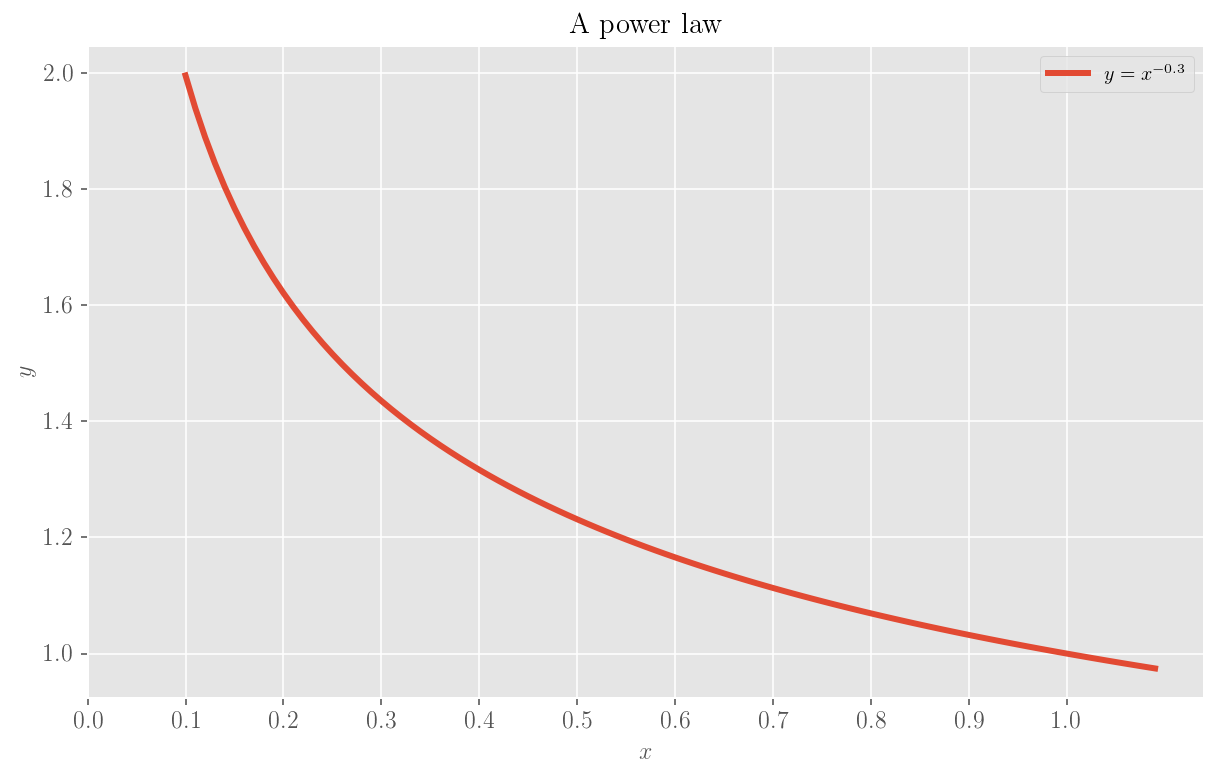

In [4]:
# Plotting a power function 

x = np.array([i for i in np.arange(0.1, 1.1, 0.01)])
y = np.array([item**-0.3 for item in x])

plt.plot(x, y, label='$y = x^{-0.3}$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xticks([i for i in np.arange(0, 1.1, 0.1)])
plt.title("A power law")
plt.legend()
plt.show();

## Power law distributions

Newman's paper in [[1]](#1) is a great source about the topic and lots of what will be presented here is re-elaborated from there. It is also a very clearly written and enjoyable paper. The Wikipedia page [[3]](#3) on the topic is also quite well written.

We talk of data distributed power law when the quantity we are measuring has a probability which is a power of the quantity itself, so that a power-law distribution has a probability density function typically written as

$$
p(x) = A x^{-\alpha} \ ,
$$

where $A$ is the normalisation constant.

We put a minus sign in front of the exponent (with respect to what we wrote above for a generic power-law function) as we're thinking of a decreasing relation.

There must be a minimum value $x_{min}$, otherwise it wouldn't be normalisable (the area under the curve would diverge, see figure above).

As for the exponent, we need to have $\alpha > 1$ for it to be a pdf, hence integrable, because by definition,

$$
\begin{align}
1 &= \int_{x_{min}}^\infty p(x) \text{d} x \\
&= A \int_{x_{min}}^\infty x^{-\alpha} \text{d} x \\
&= \frac{A}{-\alpha + 1} \Big[x^{-\alpha + 1}\Big]_{x_{min}}^\infty \\
\end{align}
$$

which is only non-diverging when $\alpha > 1$. From here, the normalisation constant is $A = (\alpha - 1) \ x_{min}^{\alpha-1}$.

### Where you find them

Many observed phenomena in several disciplines follow power-law distributions, examples are the Zipf in _linguistics_, the Pareto in _economics_, the _Taylor_ in ecology, ... In a typical situation though, it is the tail of a distribution which is power-law. 

In [[5]](#5) Mandelbrot and Taleb exquisitely talk about when using a gaussian paradigm for a power law phenomenon can lead to disaster in finance.

### What makes them interesting

* the absence of a typical _scale_: while other distributions (the gaussian being the king example) will have a typical value which can be used as representative of the distribution (along with an error), power laws are scale-free: values can span several orders of magnitude

* _scale invariance_: if the independent variable is rescaled by a factor, the law only gets affected by proportional scaling, so a consequence, this means that all power laws with the same exponents are rescaled versions of each other: 

$$p(cx) = A (cx)^{-\alpha} = A c^{-\alpha} x^{-\alpha} \ ,$$

* _long tail_: in a power law, the tail is fat, meaning that the frequency of the highly frequent items is higher than it would be in other distributions This is brilliantly explained in this blog post by Panos Ipeirotis [[4]](#4), where he points out that despite the fact that a power law is often described as a distribution where "there are a lot of very unfrequent items and a few very frequent ones", this is a distortion of reality: what is striking of a power law is that actually the very frequent items occur much more frequently than they would in other distributions.

### Moments

The _mean_ of a power law is only defined when $\alpha > 2$:

$$
\begin{align}
\mathrm{E}[x] = \bar x &= A \int_{x_{min}}^\infty x x^{-\alpha} \text{d} x \\
&= A \int_{x_{min}}^\infty x^{-\alpha + 1} \text{d} x \\
&= \frac{A}{-\alpha + 2} \Big[x^{-\alpha + 2}\Big]_{x_{min}}^\infty
\end{align}
$$

The _variance_ of a power law is only defined when $\alpha > 3$:

$$
\begin{align}
\mathrm{Var}[x] &= A \int_{x_{min}}^\infty (x-\bar x)^2 x^{-\alpha} \text{d} x \\
&= A \int_{x_{min}}^\infty x^{-\alpha + 2} + (\bar x)^2 x^{-\alpha} - 2 x^{-\alpha-1} \bar x \text{d} x
\end{align}
$$

### Plotting it

A simple plot in log-log scale of the histogram of data helps the eye spot potential power-law behaviours, but this alone is a very unreliable way of identifying the distribution. Because there is much less data in the tail than there is in the head of the distribution, the tail will appear very noisy. 

A better way is to plot the data histogrammed, but with logarithmic binning, and in log-log scale. This helps reduce the noisy tail problem. 

## References

1. <a name="1"></a> M E Newman, [Power laws, Pareto distributions and Zipf’s law](https://arxiv.org/abs/cond-mat/0412004), *Contemporary physics* 46.5, 2005
2. <a name="2"></a> J Alstott, E Bullmore, D Plenz, [powerlaw: a Python package for analysis of heavy-tailed distributions](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777), *PloS ONE* 9.1, 2014
3. <a name="3"></a> [Wikipedia on power laws](https://en.wikipedia.org/wiki/Power_law)
4. <a name="4"></a> P Ipeirotis, [Misunderstandings of power laws](http://www.behind-the-enemy-lines.com/2008/01/misunderstandings-of-power-law.html)
5. <a name="5"></a> B Mandelbrot, N N Taleb, [How the Finance Gurus Get Risk All Wrong](http://archive.fortune.com/magazines/fortune/fortune_archive/2005/07/11/8265256/index.htm), Fortune magazine, Jul 2005